<a href="https://colab.research.google.com/github/RakshithSuresh/cab-fare-payment-analysis/blob/main/Maximizing_Revenue.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🚘 Maximizing Revenue for Taxi Cab Drivers through Payment Type Analysis
**Problem Statement**

In the fast-paced taxi booking sector, making the most of revenue is essential for long-term success and driver happiness. Our goal is to use data-driven insights to maximise revenue streams for taxi drivers in order to meet this need. Our research aims to determine whether payment methods have an impact on fare pricing by focusing on the relationship between payment type and fare amount.

---
**Objective**


This project's main goal is to run an A/B test to examine the relationship between the total fare and the method of payment. We use Python hypothesis testing and descriptive statistics to extract useful information that can help taxi drivers generate more cash. In particular, we want to find out if there is a big difference in the fares for those who pay with credit cards versus those who pay with cash.

---
**Research Question**

Is there a relationship between total fare amount and payment type and can we nudge customers towards payment methods that generate higher revenue for drivers, without negatively impacting customer experience?

In [49]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importing Libraries

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import warnings
warnings.filterwarnings("ignore")

# Loading the dataset

In [51]:
df = pd.read_csv('/content/drive/My Drive/Taxi_Dataset.csv')
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,01/01/2020 12:28:15 AM,01/01/2020 12:33:03 AM,1.0,1.2,1.0,N,238.0,239.0,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1.0,01/01/2020 12:35:39 AM,01/01/2020 12:43:04 AM,1.0,1.2,1.0,N,239.0,238.0,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,1.0,01/01/2020 12:47:41 AM,01/01/2020 12:53:52 AM,1.0,0.6,1.0,N,238.0,238.0,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,1.0,01/01/2020 12:55:23 AM,01/01/2020 01:00:14 AM,1.0,0.8,1.0,N,238.0,151.0,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2.0,01/01/2020 12:01:58 AM,01/01/2020 12:04:16 AM,1.0,0.0,1.0,N,193.0,193.0,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0


### 📋 Dataset Field Descriptions

| **Field Name**          | **Description** |
|-------------------------|------------------|
| **VendorID**            | A code indicating the TPEP provider that provided the record. <br> **1 = Creative Mobile Technologies, LLC; 2 = VeriFone Inc.** |
| **tpep_pickup_datetime**| The date and time when the meter was engaged. |
| **tpep_dropoff_datetime**| The date and time when the meter was disengaged. |
| **Passenger_count**     | The number of passengers in the vehicle. <br> *This is a driver-entered value.* |
| **Trip_distance**       | The elapsed trip distance in miles reported by the taximeter. |
| **PULocationID**        | TLC Taxi Zone in which the taximeter was engaged. |
| **DOLocationID**        | TLC Taxi Zone in which the taximeter was disengaged. |
| **RateCodeID**          | The final rate code in effect at the end of the trip. <br> **1 = Standard rate**<br>**2 = JFK**<br>**3 = Newark**<br>**4 = Nassau or Westchester**<br>**5 = Negotiated fare**<br>**6 = Group ride** |
| **Store_and_fwd_flag**  | Indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward.” <br> **Y = store and forward trip**<br>**N = not a store and forward trip** |
| **Payment_type**        | A numeric code signifying how the passenger paid for the trip. <br> **1 = Credit card**<br>**2 = Cash**<br>**3 = No charge**<br>**4 = Dispute**<br>**5 = Unknown**<br>**6 = Voided trip** |
| **Fare_amount**         | The time-and-distance fare calculated by the meter. |
| **Extra**               | Miscellaneous extras and surcharges. Includes $0.50 and $1 rush hour and overnight charges. |
| **MTA_tax**             | 0.50usd MTA tax automatically triggered based on metered rate. |
| **Improvement_surcharge** | $0.30 improvement surcharge assessed at flag drop. Introduced in 2015. |
| **Tip_amount**          | Tip amount. Automatically populated for credit card tips. Cash tips are not included. |
| **Tolls_amount**        | Total amount of all tolls paid in trip. |
| **Total_amount**        | The total amount charged to passengers. Does not include cash tips. |
| **Congestion_Surcharge**| Total amount collected for NYS congestion surcharge. |


# Explorator Data Analysis(EDA)

In [52]:
df.shape

(11916667, 18)

In [53]:
# reducing size of data from 12M to 1M
df = df.sample(n=1_000_000, random_state=42)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000000 entries, 1164504 to 9377951
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               992334 non-null  object 
 1   tpep_pickup_datetime   999999 non-null  object 
 2   tpep_dropoff_datetime  999999 non-null  object 
 3   passenger_count        992333 non-null  float64
 4   trip_distance          999999 non-null  float64
 5   RatecodeID             992333 non-null  float64
 6   store_and_fwd_flag     992333 non-null  object 
 7   PULocationID           999999 non-null  float64
 8   DOLocationID           999999 non-null  float64
 9   payment_type           992333 non-null  float64
 10  fare_amount            999999 non-null  float64
 11  extra                  999999 non-null  float64
 12  mta_tax                999999 non-null  float64
 13  tip_amount             999999 non-null  float64
 14  tolls_amount           999999 non

In [55]:
# checking for missing values
df.isnull().sum()

,0
VendorID,7666
tpep_pickup_datetime,1
tpep_dropoff_datetime,1
passenger_count,7667
trip_distance,1
RatecodeID,7667
store_and_fwd_flag,7667
PULocationID,1
DOLocationID,1
payment_type,7667


In [56]:
# dropping null value records
df.dropna(inplace = True)
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
1164504,2.0,01/07/2020 05:54:45 PM,01/07/2020 06:09:09 PM,1.0,5.19,1.0,N,132.0,130.0,2.0,16.5,1.0,0.5,0.00,0.00,0.3,18.30,0.0
6746089,1.0,02/02/2020 04:30:12 PM,02/02/2020 04:59:38 PM,1.0,14.60,1.0,N,132.0,15.0,2.0,40.0,1.0,0.5,0.00,0.00,0.3,41.80,0.0
5249895,2.0,01/27/2020 12:05:50 AM,01/27/2020 12:23:39 AM,3.0,4.44,1.0,N,113.0,49.0,1.0,16.5,0.5,0.5,4.06,0.00,0.3,24.36,2.5
6039962,2.0,01/30/2020 06:29:18 PM,01/30/2020 06:36:40 PM,4.0,1.36,1.0,N,230.0,237.0,2.0,7.0,1.0,0.5,0.00,0.00,0.3,11.30,2.5
8030962,1.0,02/08/2020 12:53:04 PM,02/08/2020 01:06:11 PM,1.0,3.20,1.0,N,75.0,229.0,1.0,13.0,2.5,0.5,1.00,0.00,0.3,17.30,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5349548,2.0,01/27/2020 03:30:00 PM,01/27/2020 03:44:09 PM,1.0,1.59,1.0,N,170.0,237.0,1.0,10.0,0.0,0.5,2.50,0.00,0.3,15.80,2.5
11170251,2.0,02/23/2020 09:32:52 AM,02/23/2020 09:46:03 AM,2.0,2.51,1.0,N,140.0,239.0,1.0,11.5,0.0,0.5,2.96,0.00,0.3,17.76,2.5
333801,2.0,01/03/2020 01:42:07 AM,01/03/2020 01:51:15 AM,5.0,2.10,1.0,N,229.0,100.0,1.0,9.0,0.5,0.5,2.56,0.00,0.3,15.36,2.5
2866481,1.0,01/15/2020 06:13:56 PM,01/15/2020 06:24:50 PM,1.0,1.70,1.0,N,140.0,162.0,2.0,9.0,3.5,0.5,0.00,0.00,0.3,13.30,2.5


In [57]:
df['passenger_count'] = df['passenger_count'].astype('int64')
df['payment_type'] = df['payment_type'].astype('int64')
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
1164504,2.0,01/07/2020 05:54:45 PM,01/07/2020 06:09:09 PM,1,5.19,1.0,N,132.0,130.0,2,16.5,1.0,0.5,0.00,0.00,0.3,18.30,0.0
6746089,1.0,02/02/2020 04:30:12 PM,02/02/2020 04:59:38 PM,1,14.60,1.0,N,132.0,15.0,2,40.0,1.0,0.5,0.00,0.00,0.3,41.80,0.0
5249895,2.0,01/27/2020 12:05:50 AM,01/27/2020 12:23:39 AM,3,4.44,1.0,N,113.0,49.0,1,16.5,0.5,0.5,4.06,0.00,0.3,24.36,2.5
6039962,2.0,01/30/2020 06:29:18 PM,01/30/2020 06:36:40 PM,4,1.36,1.0,N,230.0,237.0,2,7.0,1.0,0.5,0.00,0.00,0.3,11.30,2.5
8030962,1.0,02/08/2020 12:53:04 PM,02/08/2020 01:06:11 PM,1,3.20,1.0,N,75.0,229.0,1,13.0,2.5,0.5,1.00,0.00,0.3,17.30,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5349548,2.0,01/27/2020 03:30:00 PM,01/27/2020 03:44:09 PM,1,1.59,1.0,N,170.0,237.0,1,10.0,0.0,0.5,2.50,0.00,0.3,15.80,2.5
11170251,2.0,02/23/2020 09:32:52 AM,02/23/2020 09:46:03 AM,2,2.51,1.0,N,140.0,239.0,1,11.5,0.0,0.5,2.96,0.00,0.3,17.76,2.5
333801,2.0,01/03/2020 01:42:07 AM,01/03/2020 01:51:15 AM,5,2.10,1.0,N,229.0,100.0,1,9.0,0.5,0.5,2.56,0.00,0.3,15.36,2.5
2866481,1.0,01/15/2020 06:13:56 PM,01/15/2020 06:24:50 PM,1,1.70,1.0,N,140.0,162.0,2,9.0,3.5,0.5,0.00,0.00,0.3,13.30,2.5


In [58]:
#changing pickup and dropoff datatype to datetime
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

In [59]:
# calculating duration of trip
df['duration'] = df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']
df['duration'] = df['duration'].dt.total_seconds()/60
df['duration'] = df['duration'].round(2)

In [60]:
# extracting required columns
df = df[['passenger_count','payment_type','fare_amount','trip_distance','duration']]
df

,passenger_count,payment_type,fare_amount,trip_distance,duration
1164504,1,2,16.5,5.19,14.40
6746089,1,2,40.0,14.60,29.43
5249895,3,1,16.5,4.44,17.82
6039962,4,2,7.0,1.36,7.37
8030962,1,1,13.0,3.20,13.12
...,...,...,...,...,...
5349548,1,1,10.0,1.59,14.15
11170251,2,1,11.5,2.51,13.18
333801,5,1,9.0,2.10,9.13
2866481,1,2,9.0,1.70,10.90


In [61]:
df[df.duplicated()]

,passenger_count,payment_type,fare_amount,trip_distance,duration
6801168,4,1,4.0,0.60,2.60
1827567,1,1,6.5,1.20,5.93
9194553,1,1,6.0,1.00,6.08
8794390,1,1,7.0,1.00,7.85
10490611,1,1,8.0,1.00,9.88
...,...,...,...,...,...
3142508,1,1,7.5,1.40,7.88
9791213,1,1,4.5,0.60,3.53
6630259,1,1,3.5,0.29,2.28
11170251,2,1,11.5,2.51,13.18


In [62]:
df.drop_duplicates(inplace=True)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 701400 entries, 1164504 to 9377951
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   passenger_count  701400 non-null  int64  
 1   payment_type     701400 non-null  int64  
 2   fare_amount      701400 non-null  float64
 3   trip_distance    701400 non-null  float64
 4   duration         701400 non-null  float64
dtypes: float64(3), int64(2)
memory usage: 32.1 MB


In [64]:
df['passenger_count'].value_counts(normalize=True)

,proportion
passenger_count,
1,0.644243
2,0.177064
3,0.052501
5,0.048229
6,0.028872
4,0.026129
0,0.022946
7,0.000010
8,0.000004


In [65]:
df['payment_type'].value_counts(normalize=True)

,proportion
payment_type,
1,0.708825
2,0.280522
3,0.006622
4,0.004031


In [66]:
# removing outliers by filtering passenger_count and payment_type
df = df[(df['passenger_count']>0) & (df['passenger_count']<7)]
df = df[df['payment_type']<3]
df

,passenger_count,payment_type,fare_amount,trip_distance,duration
1164504,1,2,16.5,5.19,14.40
6746089,1,2,40.0,14.60,29.43
5249895,3,1,16.5,4.44,17.82
6039962,4,2,7.0,1.36,7.37
8030962,1,1,13.0,3.20,13.12
...,...,...,...,...,...
38789,1,1,26.0,7.59,26.10
8415155,3,2,52.0,17.62,63.55
5349548,1,1,10.0,1.59,14.15
333801,5,1,9.0,2.10,9.13


In [67]:
df['payment_type'].replace([1,2],['Card','Cash'],inplace= True)
df

,passenger_count,payment_type,fare_amount,trip_distance,duration
1164504,1,Cash,16.5,5.19,14.40
6746089,1,Cash,40.0,14.60,29.43
5249895,3,Card,16.5,4.44,17.82
6039962,4,Cash,7.0,1.36,7.37
8030962,1,Card,13.0,3.20,13.12
...,...,...,...,...,...
38789,1,Card,26.0,7.59,26.10
8415155,3,Cash,52.0,17.62,63.55
5349548,1,Card,10.0,1.59,14.15
333801,5,Card,9.0,2.10,9.13


In [68]:
df.describe()

,passenger_count,fare_amount,trip_distance,duration
count,678199.000000,678199.000000,678199.000000,678199.000000
mean,1.717667,14.714154,3.515623,19.344211
std,1.290029,13.002605,4.221146,75.208702
min,1.000000,-100.000000,-10.940000,-9990.670000
25%,1.000000,7.500000,1.180000,7.975000
50%,1.000000,11.000000,2.030000,12.980000
75%,2.000000,16.500000,3.800000,19.950000
max,6.000000,1718.500000,207.110000,3267.330000


In [69]:
df = df[df['fare_amount']>0]
df = df[df['trip_distance']>0]
df = df[df['duration']>0]
df

,passenger_count,payment_type,fare_amount,trip_distance,duration
1164504,1,Cash,16.5,5.19,14.40
6746089,1,Cash,40.0,14.60,29.43
5249895,3,Card,16.5,4.44,17.82
6039962,4,Cash,7.0,1.36,7.37
8030962,1,Card,13.0,3.20,13.12
...,...,...,...,...,...
38789,1,Card,26.0,7.59,26.10
8415155,3,Cash,52.0,17.62,63.55
5349548,1,Card,10.0,1.59,14.15
333801,5,Card,9.0,2.10,9.13


In [70]:
df.describe()

,passenger_count,fare_amount,trip_distance,duration
count,671861.000000,671861.000000,671861.000000,671861.000000
mean,1.721110,14.580164,3.545030,19.381159
std,1.292843,12.506035,4.224597,74.370418
min,1.000000,0.010000,0.010000,0.020000
25%,1.000000,7.500000,1.200000,8.030000
50%,1.000000,10.500000,2.050000,13.000000
75%,2.000000,16.500000,3.820000,19.930000
max,6.000000,1718.500000,207.110000,3267.330000


{'whiskers': [<matplotlib.lines.Line2D at 0x7efbdff5f310>,
 'caps': [<matplotlib.lines.Line2D at 0x7efbdff7dad0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7efbdff5c550>],
 'medians': [<matplotlib.lines.Line2D at 0x7efbdff6dcd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7efbdff6e350>],
 'means': []}

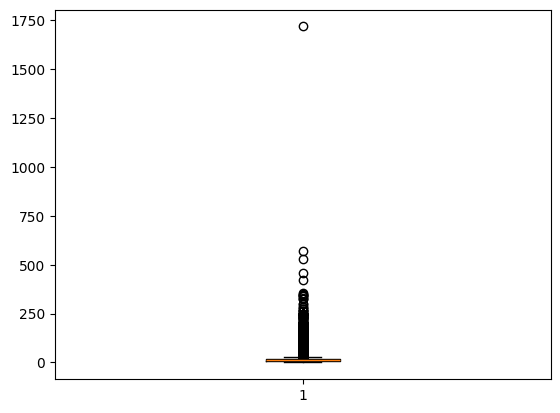

In [71]:
# visually validating outliers
plt.boxplot(df['fare_amount'])

In [72]:
# removing outlier
for col in ['fare_amount','trip_distance','duration']:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  IQR = q3 - q1

  lower_bound = q1 - 1.5 * IQR
  upper_bound = q3 + 1.5 * IQR

  df = df[(df[col]>= lower_bound)&(df[col]<= upper_bound)]

In [73]:
df

,passenger_count,payment_type,fare_amount,trip_distance,duration
1164504,1,Cash,16.5,5.19,14.40
5249895,3,Card,16.5,4.44,17.82
6039962,4,Cash,7.0,1.36,7.37
8030962,1,Card,13.0,3.20,13.12
3135793,1,Card,5.0,0.70,5.35
...,...,...,...,...,...
4978652,1,Card,15.0,3.67,18.53
1801392,1,Card,9.0,1.33,11.90
11038126,1,Card,12.5,2.42,17.22
5349548,1,Card,10.0,1.59,14.15


In [74]:
df.describe()

,passenger_count,fare_amount,trip_distance,duration
count,559795.000000,559795.000000,559795.000000,559795.000000
mean,1.753178,10.254456,2.058418,12.183571
std,1.316791,4.301596,1.294630,6.343952
min,1.000000,0.010000,0.010000,0.020000
25%,1.000000,7.000000,1.080000,7.270000
50%,1.000000,9.500000,1.740000,11.330000
75%,2.000000,13.000000,2.730000,16.280000
max,6.000000,30.000000,6.180000,30.680000


# Payment type distribution

### 🔹 Distribution of Fare Amount by Payment Type

This histogram compares the distribution of **fare amounts** for trips paid by **card (light blue)** and **cash (dark blue)**.

- Most fares cluster between **$5 and $15** for both payment types.
- **Card payments** dominate the higher fare ranges, indicating that passengers who pay by card are more likely to take **costlier trips**.
- **Cash fares** are heavily concentrated in the lower fare brackets, suggesting shorter or more budget-conscious trips.
- The distribution is **right-skewed** for both groups, meaning a small number of trips have very high fares.

This pattern suggests that drivers may earn **higher fares on average from card-paying passengers**.

---

### 🔹 Distribution of Trip Distance by Payment Type

This histogram shows the **trip distance (in miles)** split by payment method.

- Most trips, regardless of payment type, are **under 3 miles**.
- **Card trips** again are more frequent across all distance ranges, especially for **longer trips** beyond 3 miles.
- **Cash trips drop off steeply** after about 2–3 miles, indicating that cash is more common in short-distance travel.

These insights reinforce the idea that **longer, more lucrative trips are more likely to be paid by card**, potentially increasing revenue for drivers who serve these rides.

---

Together, these charts support the hypothesis that **payment type is linked to fare and distance**, making it a useful variable for strategy and revenue optimization.


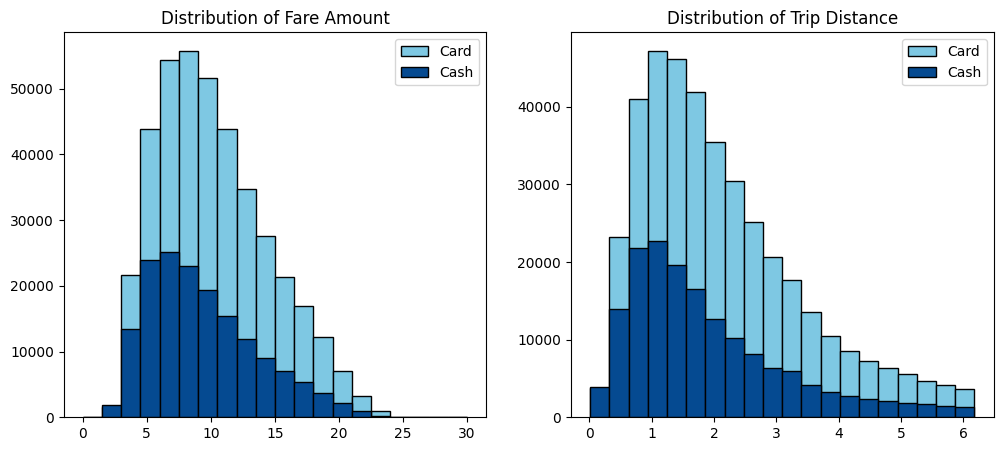

In [75]:
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
plt.title("Distribution of Fare Amount")
plt.hist(df[df['payment_type']=='Card']['fare_amount'],histtype='barstacked', bins = 20, edgecolor = 'k', color='#7EC8E3',label= 'Card')
plt.hist(df[df['payment_type']=='Cash']['fare_amount'],histtype='barstacked', bins = 20, edgecolor = 'k', color='#054A91',label= 'Cash')
plt.legend()

plt.subplot(1,2,2)
plt.title("Distribution of Trip Distance")
plt.hist(df[df['payment_type']=='Card']['trip_distance'],histtype='barstacked', bins = 20, edgecolor = 'k', color='#7EC8E3',label= 'Card')
plt.hist(df[df['payment_type']=='Cash']['trip_distance'],histtype='barstacked', bins = 20, edgecolor = 'k', color='#054A91',label= 'Cash')
plt.legend()
plt.show()

In [76]:
df.groupby('payment_type').agg(
    {'fare_amount':['mean','std'],
     'trip_distance':['mean','std'] }
)

fare_amount           trip_distance          
                    mean       std          mean       std
payment_type                                              
Card           10.507979  4.301737      2.126832  1.294544
Cash            9.635957  4.238105      1.891515  1.279586

# 🔸 Preference of Payment Type

The pie chart illustrates the proportion of trips paid by **card** versus **cash** among the sampled 1 million taxi rides.

- **Card payments** make up approximately **70.9%** of all transactions.
- **Cash payments** account for the remaining **29.1%**.

This clearly indicates that **card is the dominant payment method** used by passengers.

**Interpretation:**
- The high preference for card payments aligns with modern trends of digital transactions and may reflect both convenience and traceability.
- Given that card payments are also associated with **higher fare amounts and longer trips** (as seen in earlier histograms), this majority usage suggests that card-paying customers may contribute more significantly to driver revenue.


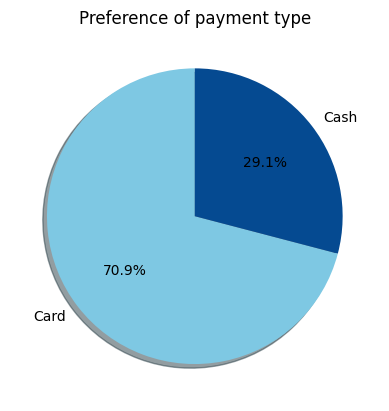

In [77]:
plt.title('Preference of payment type')
plt.pie(df['payment_type'].value_counts(normalize=True),labels = df['payment_type'].value_counts().index,
        startangle = 90, shadow = True,autopct = '%1.1f%%', colors = ['#7EC8E3','#054A91'])

plt.show()

# Passenger Count Analysis

In [78]:
passenger_count = df.groupby(['payment_type','passenger_count'])[['passenger_count']].count()
passenger_count.rename(columns = {'passenger_count':'count'}, inplace = True)
passenger_count.reset_index(inplace = True)

In [79]:
# calculating perecentage
passenger_count['perc'] = ((passenger_count['count']/passenger_count['count'].sum())*100).round(2)
passenger_count

,payment_type,passenger_count,count,perc
0,Card,1,253818,45.34
1,Card,2,74259,13.27
2,Card,3,23040,4.12
3,Card,4,10727,1.92
4,Card,5,22067,3.94
5,Card,6,13135,2.35
6,Cash,1,107076,19.13
7,Cash,2,29876,5.34
8,Cash,3,8700,1.55
9,Cash,4,5044,0.90


In [80]:
df2 = pd.DataFrame(columns = ['payment_type',1,2,3,4,5,6])
df2['payment_type'] = ['Card','Cash']
df2.iloc[0,1:] = passenger_count.iloc[0:6,-1]
df2.iloc[1,1:] = passenger_count.iloc[6:,-1]
df2

,payment_type,1,2,3,4,5,6
0,Card,45.34,13.27,4.12,1.92,3.94,2.35
1,Cash,19.13,5.34,1.55,0.9,1.34,0.81


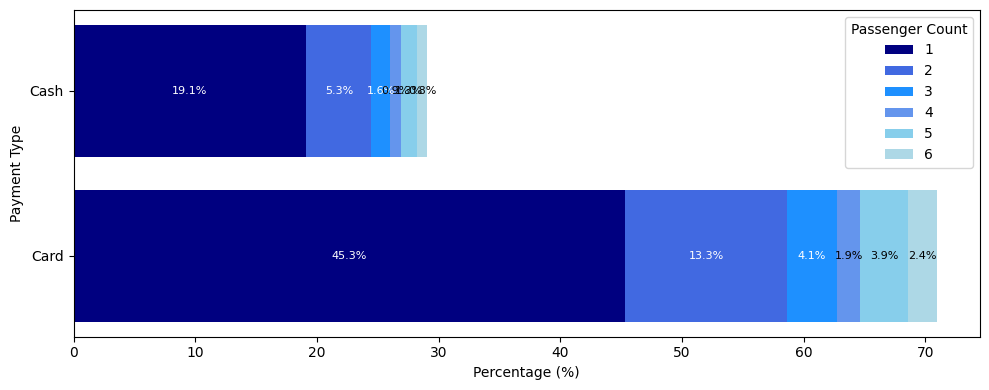

In [81]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

def get_contrasting_text_color(hex_color):
    """Return 'white' or 'black' based on background brightness for legibility."""
    r, g, b = mcolors.to_rgb(hex_color)
    brightness = r*0.299 + g*0.587 + b*0.114
    return 'black' if brightness > 0.5 else 'white'

colors = ['#000080', '#4169E1', '#1E90FF', '#6495ED', '#87CEEB', '#ADD8E6']

fig, ax = plt.subplots(figsize=(10, 4))
left = [0] * len(df2)
labels = df2['payment_type']

for i, col in enumerate(df2.columns[1:]):
    ax.barh(labels, df2[col], left=left, color=colors[i], label=col)

    for j, val in enumerate(df2[col]):
        if val > 0:
            text_color = get_contrasting_text_color(colors[i])
            ax.text(left[j] + val / 2, j, f'{val:.1f}%',
                    ha='center', va='center', fontsize=8, color=text_color)

    left = [left[k] + df2[col][k] for k in range(len(df2))]

ax.legend(title='Passenger Count')
ax.set_xlabel("Percentage (%)")
ax.set_ylabel("Payment Type")
plt.tight_layout()
plt.show()


### 🧍 Passenger Count vs Payment Type

The horizontal stacked bar chart illustrates how passenger count varies between **card** and **cash** payments as a percentage of total trips.

#### 🔹 Key Observations:
- **Card Payments:**
  - Trips with **1 passenger** dominate (45.3%), followed by **2 passengers** (13.3%).
  - Even trips with 3–6 passengers are present with consistent share (~12% combined), showing that card is used across a wide range of group sizes.

- **Cash Payments:**
  - Also dominated by **1-passenger trips** (19.1%), but the share of larger groups (3–6) is smaller compared to card.
  - Indicates that cash trips are more common in **small, likely shorter, solo rides**.

#### 💡 Insight:
Card payments are not only more frequent but also span a broader distribution of group sizes, suggesting higher versatility and preference across trip types. This reinforces the recommendation to **encourage credit card usage** for revenue optimization.

# Hypothesis Testing

**Null Hypothesis:** There is no difference in average fare between customers who use credit card and those who use cash

**Alternate Hypothesis:** There is a difference in average fare between customers who use credit card and customers who use cash

# Performing T-test to find out

### 📉 Normality Check (Q-Q Plot)

We used a Q-Q plot to evaluate whether `fare_amount` follows a normal distribution. The plot reveals significant deviation from the 45° reference line, especially in the tails, indicating that the data is **not normally distributed**.

However, since our sample size is large (1 million records), we rely on the **Central Limit Theorem**, which allows the use of a t-test even when the data is not perfectly normal. Therefore, the results of our t-test remain statistically valid.


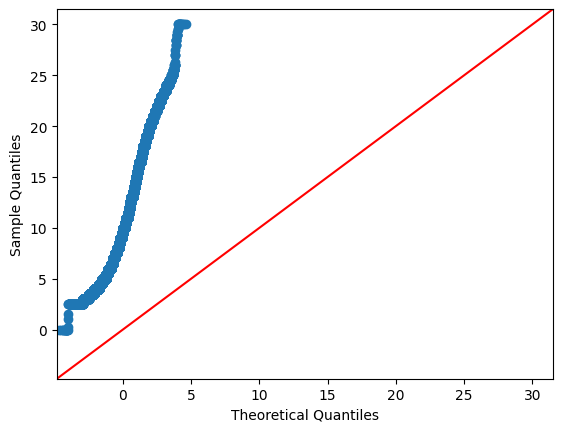

In [82]:
import statsmodels.api as sm
sm.qqplot(df['fare_amount'],line='45')
plt.show()

In [85]:
card_sample = df[df['payment_type']== 'Card']['fare_amount']
cash_sample = df[df['payment_type'] == 'Cash']['fare_amount']

In [86]:
t_stats, p_value = st.ttest_ind(a= card_sample, b=cash_sample, equal_var=False)
print("T-static", t_stats, "p-value", p_value)

T-static 69.60158361856197 p-value 0.0


### ✅ T-Test Result Interpretation

We conducted an independent two-sample t-test to compare the **average fare amounts** between rides paid by **credit card** and **cash**.

- **T-statistic**: 69.60
- **P-value**: 0.0

### 📌 Conclusion:
Since the **p-value is effectively 0.0**, which is **far below any common significance level (e.g., 0.05 or 0.01)**, we **reject the null hypothesis**.

This result provides **strong statistical evidence** that there is a **significant difference in average fare** between card and cash payment types.

### 💡 Insight:
Card-paying customers tend to generate **higher fare amounts** on average compared to cash-paying customers. This supports the business hypothesis that nudging users toward card payments could **increase driver revenue**.


## 📌 Recommendations

Based on the analysis of payment type and fare amount, we propose the following strategies to help taxi cab drivers maximize revenue:

1. 💳 **Promote Credit Card Payments**
   - Encourage customers to pay with credit cards to capitalize on their association with higher fare values.
   - Highlight the ease and flexibility of digital payment to increase adoption.

2. 🎁 **Offer Incentives for Card Use**
   - Implement small discounts, loyalty points, or bonus offers for customers who choose credit card payments.
   - Run targeted promotions during peak hours to nudge payment behavior.

3. 🛡️ **Improve Payment Experience**
   - Ensure that credit card terminals are fast, reliable, and secure in all cabs.
   - Provide receipts and tip suggestions to improve customer trust and satisfaction.

4. 📊 **Monitor and Adjust**
   - Continuously monitor payment trends and fare outcomes to fine-tune incentive programs.
   - Adapt based on customer feedback and seasonal demand patterns.

By steering passengers toward more profitable payment methods like credit cards—without compromising on convenience—taxi services can enhance both **driver revenue** and **customer satisfaction**.
